In [18]:
import sys
import seaborn as sns
import pandas as pd
sys.path.append("../")
from src.eval.episode import Episode
import matplotlib.pyplot as plt
import numpy as np

In [10]:
results = {}
algo_names = [
    "do_nothing",
    "rl",
    "rl_stopped",
    "bo_normal",
    "bo_contextual",
    # "bo_contextual_reduce_beta",
    "es",
    "es_tuned",
    # "es_trackoptimum",
]
for algo in algo_names:
    results[algo] = Episode.load(
        f"../data/bo_vs_rl/simulation/continuous_sin/{algo}/recorded_episode_1.pkl"
    )

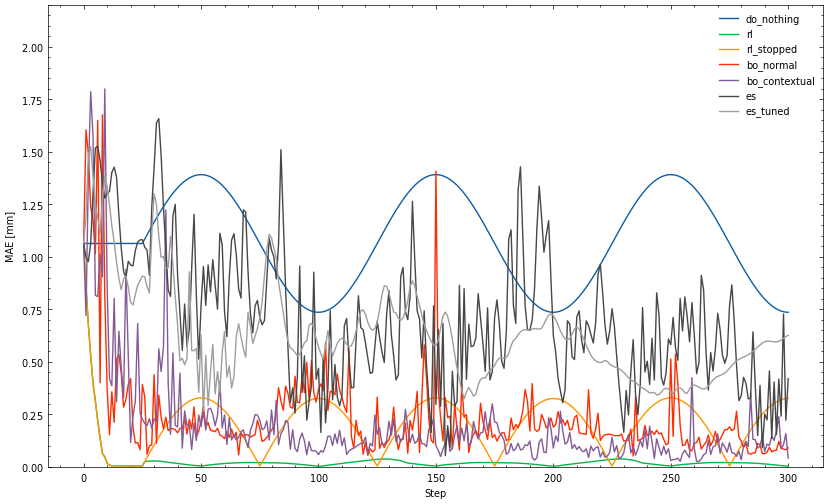

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
maes = np.array([results[algo].maes() for algo in algo_names])*1e3
df = pd.DataFrame(maes.T, columns=algo_names)
sns.lineplot(data=df, ax=ax, dashes=False)
# for algo in algo_names:
#     ax.plot(np.array(results[algo].maes()) * 1e3, label=algo)
# ax.legend()
ax.set_ylabel("MAE [mm]")
ax.set_xlabel("Step")
ax.set_ylim(0, 2.2)
fig.savefig("../figures/new_optimizers/continuous_control_new.png", dpi=300)

Text(0, 0.5, 'Count')

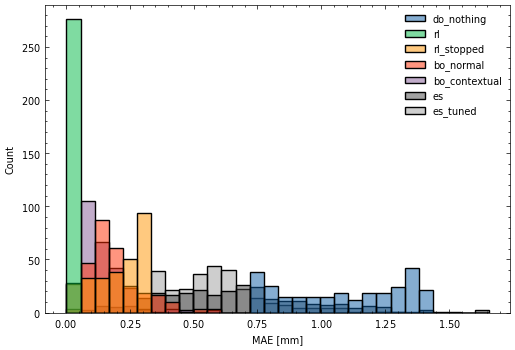

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
# for algo in algo_names:
#     # plot maes in histogram
#     ax.hist(
#         np.array(results[algo].maes())[25:] * 1e3,
#         range=[0, 1.5],
#         bins=30,
#         label=algo,
#         alpha=0.5,
#     )

# put maes in pd dataframe
maes = np.array([results[algo].maes()[25:] for algo in algo_names])*1e3
df = pd.DataFrame(maes.T, columns=algo_names)

sns.histplot(df, ax=ax, bins=30, legend=True, alpha=0.5)

# ax.legend()
ax.set_xlabel("MAE [mm]")
ax.set_ylabel("Count")

In [22]:
df

,do_nothing,rl,rl_stopped,bo_normal,bo_contextual,es,es_tuned
0,1.062495,0.002955,0.002955,0.390587,0.226787,1.080799,0.906926
1,1.083073,0.023420,0.023316,0.334018,0.204999,1.044938,0.903617
2,1.103569,0.025423,0.043597,0.058561,0.194850,1.030303,0.856876
3,1.123903,0.025935,0.063718,0.098984,0.228269,0.910513,0.826816
4,1.143994,0.026618,0.083599,0.103459,0.182442,1.233920,1.109679
...,...,...,...,...,...,...,...
271,0.745078,0.005808,0.314205,0.119779,0.237776,0.416747,0.596537
272,0.740587,0.004815,0.318649,0.086000,0.085699,0.240520,0.602595
273,0.737366,0.003579,0.321836,0.083528,0.103516,0.726404,0.610958
274,0.735429,0.002610,0.323753,0.079863,0.156824,0.220619,0.619264
